# 1-Load and Explore the Data

In [1]:
import numpy as np 
import pandas as pd

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#missing data in train_df

total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

#train_df.isnull().sum()

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [6]:
#missing data in test_df

total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

#test_df.info()

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461


we'll delete some variables with missing data like :'Alley','FireplaceQu','PoolQC','MiscFeature','Fence'

In [7]:
# Separate training data and the target.

X_train = train_df.drop(['Id' ,'SalePrice','Alley','FireplaceQu','PoolQC','MiscFeature','Fence'] , axis=1 )
y_train = np.log(train_df['SalePrice'])                    # Transform target variable with logarithm
X_test  = test_df.drop(['Id','Alley','FireplaceQu','PoolQC','MiscFeature','Fence'] , axis=1 )


# 2-Data Visualizations

In [8]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

1. Distribution of Sale Prices

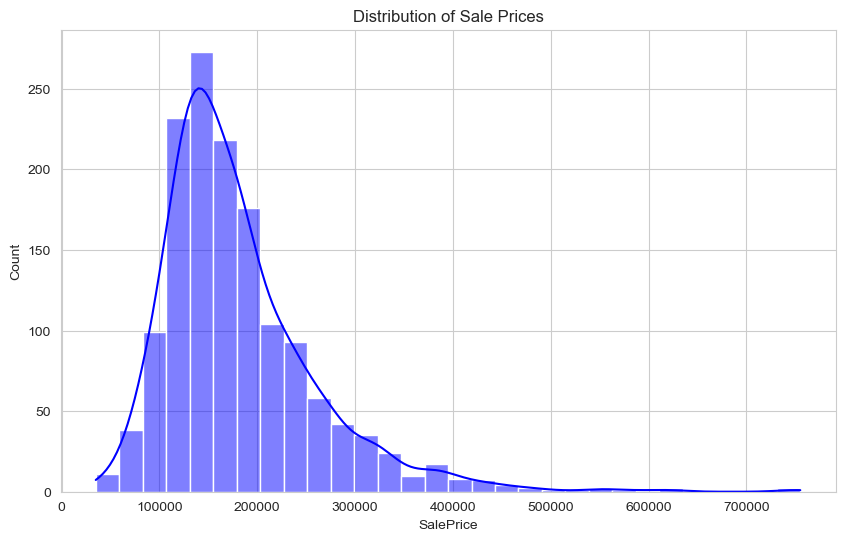

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.histplot(train_df['SalePrice'], kde=True , bins=30 , color= 'blue')
plt.title('Distribution of Sale Prices')
#plt.xlable('Sale Price')
#plt.ylable('Frequency')
plt.show()

2-Correlation Heatmap

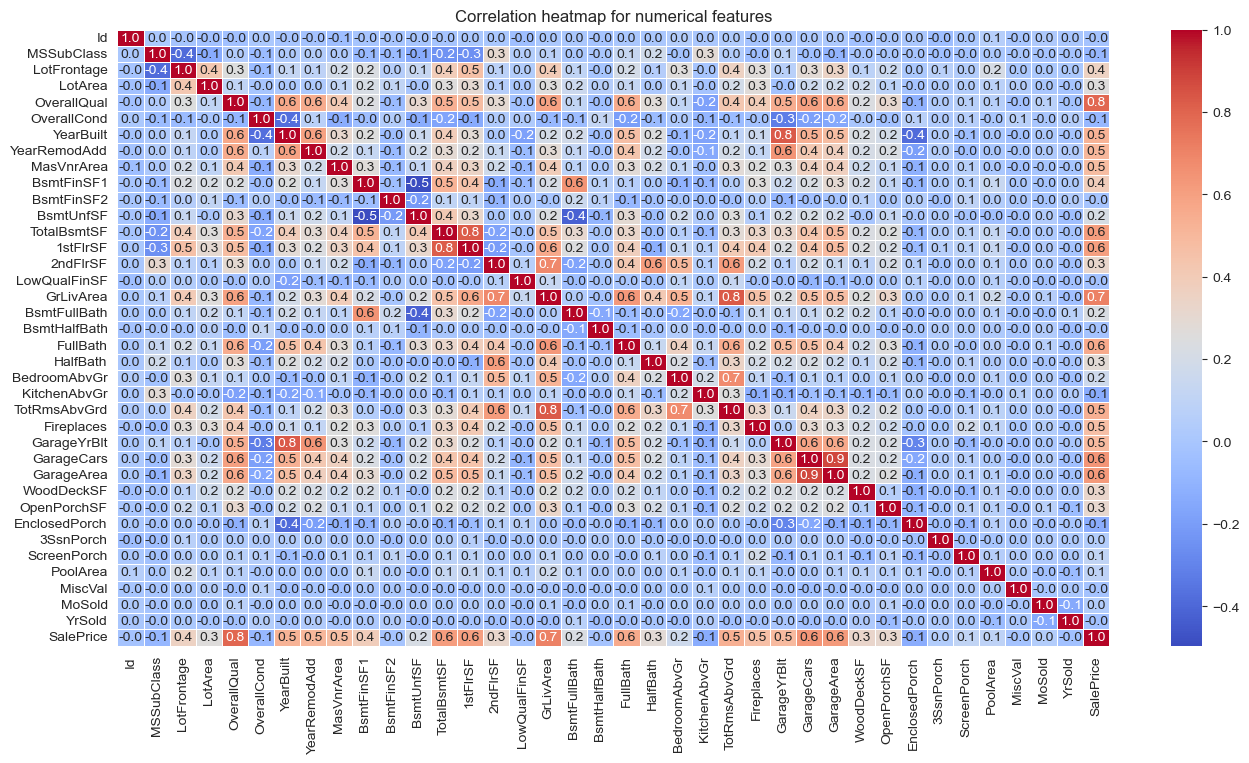

In [10]:
#Correlation heat map for numerical features
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(train_df.corr(), annot=True , cmap='coolwarm' , fmt='.1f' , linewidth=.5)
plt.title('Correlation heatmap for numerical features')
#plt.figure(figsize=(15,16))
plt.show()

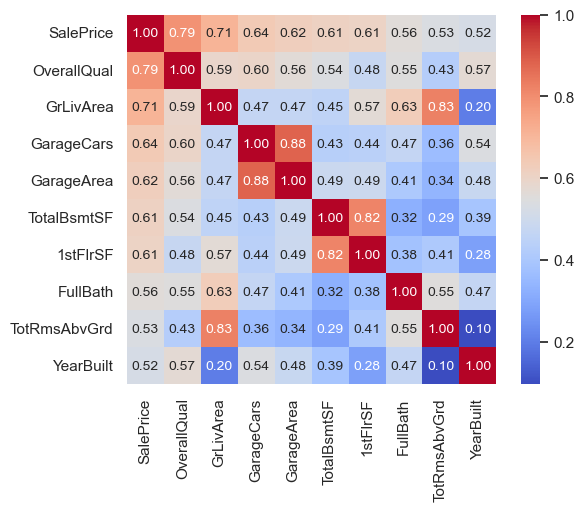

In [11]:
k = 10   #number of variables for heatmap
cols = train_df.corr().nlargest(k, 'SalePrice')['SalePrice'].index  # nlargest pick the most powerfull correlation
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1)
sns.heatmap(cm, cbar=True, annot=True, cmap='coolwarm', square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


3-Scatter plots between 'SalePrice' and correlated variables

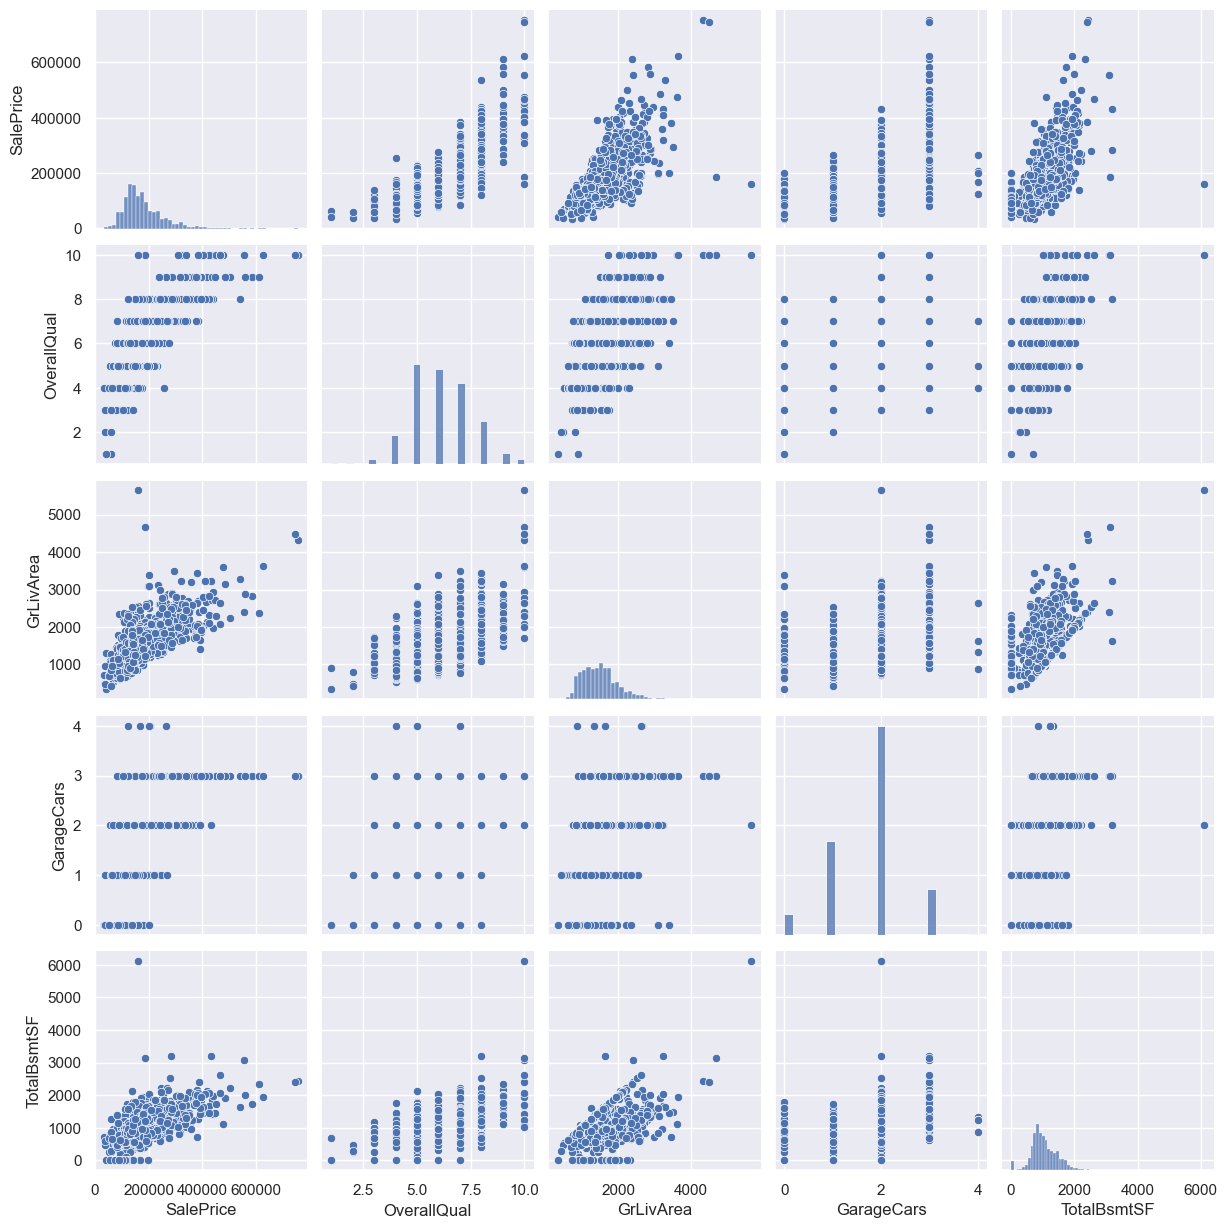

In [12]:
#scatterplot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(train_df[cols], height = 2.5 )
plt.show()


4-Boxplot of Sale Prices by Overall Quality

Text(0.5, 1.0, 'Sale Price box by Overall Quality')

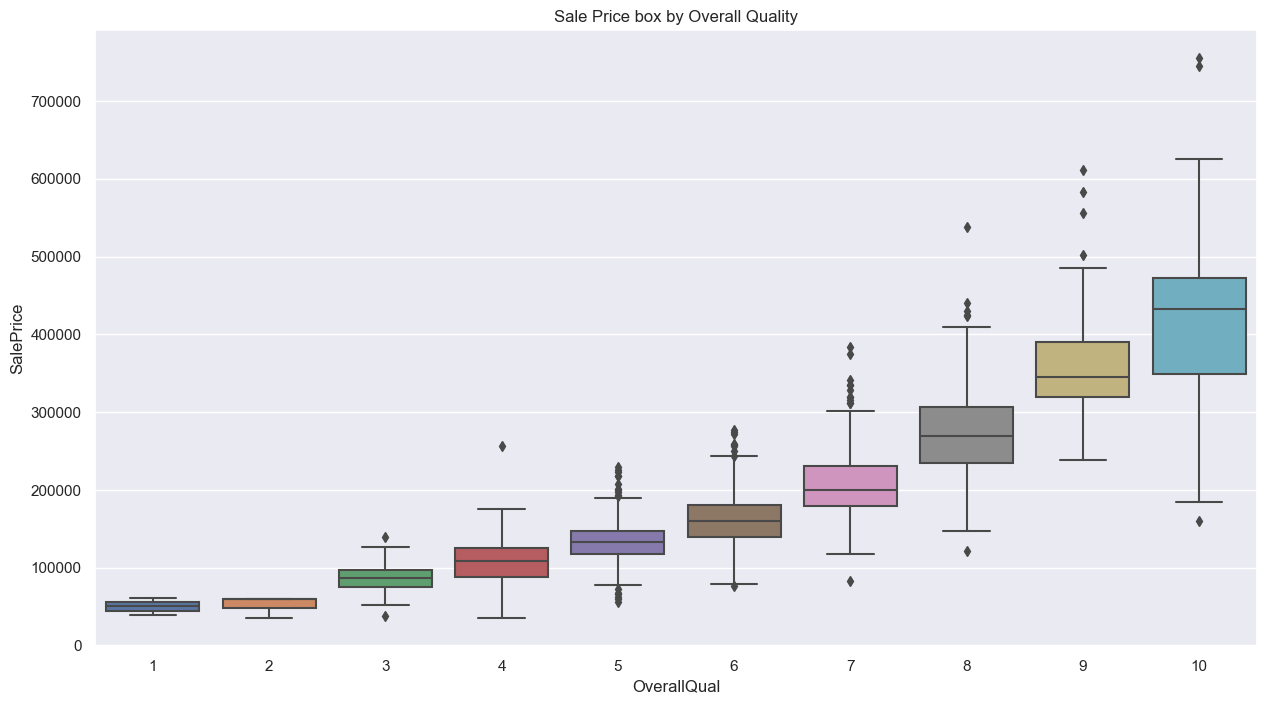

In [13]:
# This can show the relationship between the overall quality of a house and its sale price.
plt.figure(figsize=(15,8))
sns.boxplot(x='OverallQual' , y='SalePrice' , data=train_df)
plt.title('Sale Price box by Overall Quality')


5-Relationship with numerical variable('GrLivArea')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

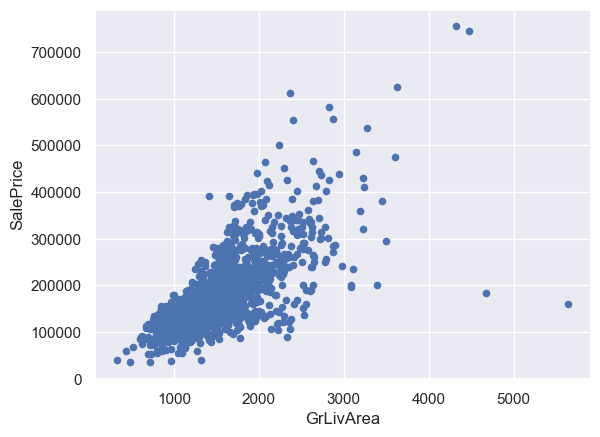

In [14]:
data = pd.concat([train_df['SalePrice'] , train_df['GrLivArea'] ], axis=1)
data.plot.scatter(x='GrLivArea' , y='SalePrice')

# 3-Data Preprocessing

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 

In [16]:
# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64' , 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# preprocessing for numerical data 
numerical_transformer = Pipeline(steps=[
    ('imputer' , SimpleImputer(strategy='mean' )),  # filling nan or 0 with mean
    ('scaler' , StandardScaler() ) ])          # scalling the data with : z = (x - u) / s
    
# preprocessing for categorical data 
categorical_transformer = Pipeline(steps=[
    ('imputer' , SimpleImputer(strategy='most_frequent' )),
    ('onehot' , OneHotEncoder(handle_unknown='ignore'))])


# preprocessing process 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])



#preprocessor.fit_transform(X_train)

# 4-Define the Model and Modeling Code in a Pipeline

Trying LinearRegression Model 

In [17]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,random_state=10)

In [18]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])


# Train the model
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrL...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'Garage

In [19]:
from sklearn import set_config

set_config(display='diagram')
display(my_pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrL...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=10))])

# 5-Score

In [20]:
score = my_pipeline.score(X_train, y_train)
print(f"Model score: {score}") # model accuracy


Model score: 0.9826348558548014


# 6-Predict and Prepare Submission

In [21]:
# Predictions in log scale
predictions_log_scale = my_pipeline.predict(X_test)
# Convert predictions back from log scale
predictions = np.exp(predictions_log_scale)

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predictions})



predictions_df.head()

,Id,SalePrice
0,1461,127127.153211
1,1462,151967.036786
2,1463,180827.443400
3,1464,182951.922453
4,1465,195669.483500


In [22]:
predictions_df.to_csv("Final submission.csv", index=False)